# Maximum Likelihood Estimation (MLE)

In this notebook, we use MLE to **estimate** the mean and standard deviation (or variance) of a **univariate Gaussian distribution**.


We assume that there are $N$ one-dimensional data points drawn from a Gaussian distribution with a known mean ($\mu$) and variance ($\sigma^2$): $X$= $x_1$, $x_2$, ..., $x_N$ 

- $X \sim \mathcal{N}(\mu, \sigma^2)$

The Probability Density Function (PDF) of this distribution is:

- $p(x_i \rvert \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{1}{2\sigma^2} (x_i - \mu)^2}$


Using MLE, we can learn the two parameters (i.e., mean and variance) of this Gaussian distribution, as follows.

- $\hat{\mu}_{MLE} = \frac{1}{N}\displaystyle\sum_{i=1}^{N} x_i$


- $\hat{\sigma}^2_{MLE} = \frac{1}{N}\displaystyle\sum_{i=1}^{N} (x_i - \hat{\mu}_{MLE})^2$

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Generate Synthetic Data Points

We generate a set of 1D data points from a Gaussian distribution with a known mean and standard distribution.

Mean:  3
STD:  0.8


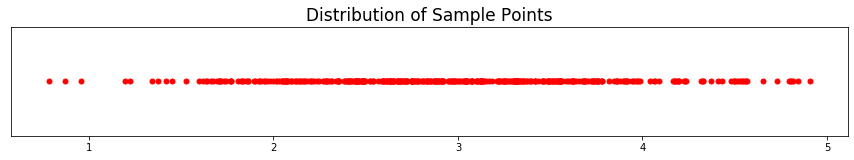

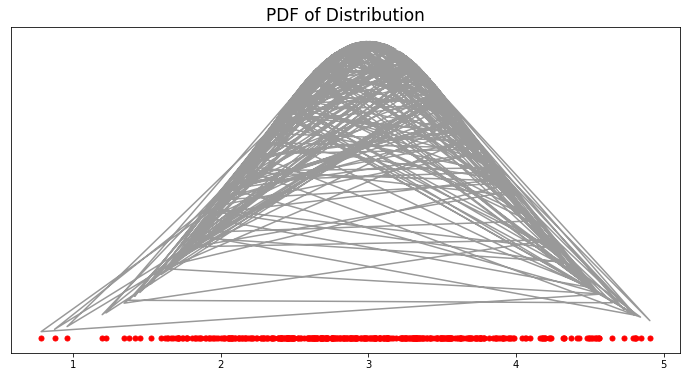

In [40]:
np.random.seed(0) # for reproducible random results

#Set Mean and Standard Deviation of the red points
red_mean = 3
red_std = 0.8


# Number of the points to generate from the distribution
numberOfRedPoints = 400


# Generate red points using the mean and std
red = np.random.normal(red_mean, red_std, numberOfRedPoints)


print("Mean: ", red_mean)
print("STD: ", red_std)


# Plot the red points
plt.rcParams['figure.figsize'] = (15, 2)
plt.plot(red, np.zeros_like(red), '.', color='r', markersize=10)
plt.title('Distribution of Sample Points', fontsize=17)
plt.yticks([]); # Doesn't show the y coordinates
plt.show()



# Compute the likelihood of the red and blue distributions by computing respective PDF's
red_likelihood = stats.norm(red_mean, red_std).pdf(red)


# Plot the PDF of the distributions
plt.figure(figsize=(12, 6))
plt.title('PDF of Distribution', fontsize=17)
plt.plot(red, np.zeros_like(red), '.', color='r', markersize=10)
plt.plot(red, red_likelihood, color='k', alpha=0.4)
plt.yticks([]);
plt.show()

## Functions for MLE Mean and STD

The following two functions are based on the estimated mean and variance given by MLE for a Gaussian distribution.

In [12]:
def estimate_mean(data):
    return np.sum(data) / len(data)


def estimate_std(data, mean):
    variance = np.sum((data - mean)**2) / len(data)
    return np.sqrt(variance)

## MLE

Apply MLE to learn the two unknown parameters (mean and STD) of the Gaussian distribution that generated the data.

Estimated Mean:  2.9771584038353494
Actual Mean:  3

Estimated STD:  0.7905088997092665
Actual STD:  0.8


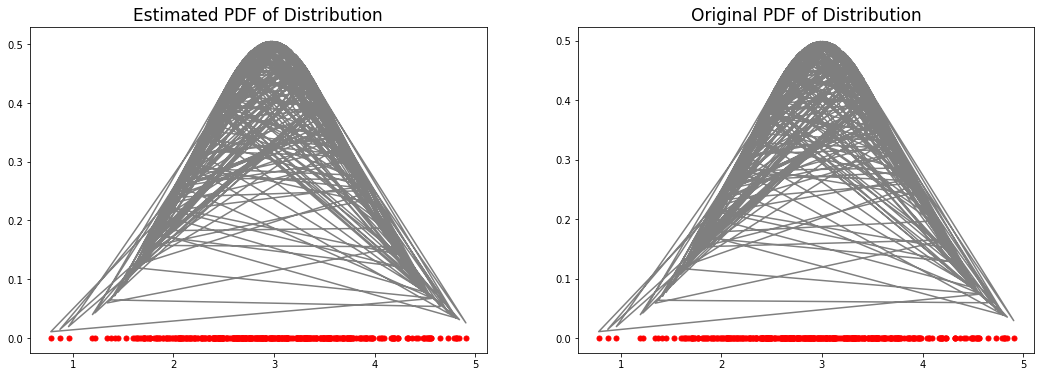

In [41]:
# MLE Mean
red_mean_estimated = estimate_mean(red)

# MLE STD
red_std_estimated = estimate_std(red,red_mean_estimated)

print("Estimated Mean: ", red_mean_estimated)
print("Actual Mean: ", red_mean)


print("\nEstimated STD: ", red_std_estimated)
print("Actual STD: ", red_std)


# Compute the likelihood of each data point appearing under the estimated parameters
red_likelihood_estimated = stats.norm(red_mean_estimated, red_std_estimated).pdf(red)


# Plot the PDF of the distributions
plt.figure(figsize=(18, 6))


plt.subplot(121)
plt.title('Estimated PDF of Distribution', fontsize=17)
plt.plot(red, red_likelihood_estimated, color='k', alpha=0.5)
plt.plot(red, np.zeros_like(red), '.', color='r', markersize=10)


plt.subplot(122)
plt.title('Original PDF of Distribution', fontsize=17)
plt.plot(red, red_likelihood, color='k', alpha=0.5)
plt.plot(red, np.zeros_like(red), '.', color='r', markersize=10)

plt.show()